# Hacker News Project

We're specifically interested in posts with titles that begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question.   
Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just something interesting.   
We'll compare these two types of posts to determine the following:  
-Do Ask HN or Show HN receive more comments on average?
-Do posts created at a certain time receive more comments on average?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
df = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')
df.head(20)

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14
5,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
6,12578954,Macalifa A new open-source music app for UWP ...,http://forums.windowscentral.com/windows-phone...,1,0,thecodrr,9/26/2016 3:06
7,12578942,GitHub theweavrs/Macalifa: A music player wri...,https://github.com/theweavrs/Macalifa,1,0,thecodrr,9/26/2016 3:04
8,12578919,Google Allo first Impression,http://prodissues.com/2016/09/google-allo-firs...,3,0,jandll,9/26/2016 2:57
9,12578918,Advanced Multimedia on the Linux Command Line,https://avi.alkalay.net/2016/09/multimedia-lin...,1,0,mynameislegion,9/26/2016 2:56


# Mean Analysis

In [19]:
#get all comments that have Ask HN and Show HN
model = df[df['title'].str.contains('Ask HN|Show HN')].reset_index()

In [20]:
model

,index,id,title,url,num_points,num_comments,author,created_at
0,10,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53
1,42,12578522,Ask HN: How do you pass on your work when you ...,NaN,6,3,PascLeRasc,9/26/2016 1:17
2,52,12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,9/26/2016 0:36
3,58,12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,9/26/2016 0:01
4,64,12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,9/25/2016 23:44
...,...,...,...,...,...,...,...,...
19287,293047,10177359,Ask HN: Is coursera specialization in product ...,NaN,1,0,pipipzz,9/6/2015 11:27
19288,293052,10177317,Ask HN: Any meteor devs out there who could sp...,NaN,2,1,louisswiss,9/6/2015 10:52
19289,293055,10177309,Ask HN: Any recommendations for books about ra...,NaN,2,4,rationalthrowa,9/6/2015 10:46
19290,293073,10177200,Ask HN: Where do you look for work if you need...,NaN,14,20,coroutines,9/6/2015 9:36


In [23]:
#Just leave Ask HN and Show HN in title
model['title'] = model.title.str.extract('(Ask HN|Show HN)')

In [24]:
model

,index,id,title,url,num_points,num_comments,author,created_at
0,10,12578908,Ask HN,NaN,4,7,Sevrene,9/26/2016 2:53
1,42,12578522,Ask HN,NaN,6,3,PascLeRasc,9/26/2016 1:17
2,52,12578335,Show HN,http://puns.samueltaylor.org/,2,0,saamm,9/26/2016 0:36
3,58,12578182,Show HN,https://christinecha.github.io/choreographer-js/,1,0,christinecha,9/26/2016 0:01
4,64,12578098,Show HN,http://grondilu.github.io/dna.html,1,0,grondilu,9/25/2016 23:44
...,...,...,...,...,...,...,...,...
19287,293047,10177359,Ask HN,NaN,1,0,pipipzz,9/6/2015 11:27
19288,293052,10177317,Ask HN,NaN,2,1,louisswiss,9/6/2015 10:52
19289,293055,10177309,Ask HN,NaN,2,4,rationalthrowa,9/6/2015 10:46
19290,293073,10177200,Ask HN,NaN,14,20,coroutines,9/6/2015 9:36


In [28]:
model = model.drop(['index','id','url'],axis=1)

In [29]:
#find any null values
model.isna().sum()

title           0
num_points      0
num_comments    0
author          0
created_at      0
dtype: int64

In [31]:
#find any duplicates
model.duplicated().sum()

1

In [33]:
# drop duplicates
model = model.drop_duplicates()

In [34]:
model.head()

,title,num_points,num_comments,author,created_at
0,Ask HN,4,7,Sevrene,9/26/2016 2:53
1,Ask HN,6,3,PascLeRasc,9/26/2016 1:17
2,Show HN,2,0,saamm,9/26/2016 0:36
3,Show HN,1,0,christinecha,9/26/2016 0:01
4,Show HN,1,0,grondilu,9/25/2016 23:44


In [43]:
#group by sum and average for each title
summary = model.groupby('title').agg(comm_sum =('num_comments','sum'),comm_avg=('num_comments','mean')).reset_index()

In [44]:
summary

,title,comm_sum,comm_avg
0,Ask HN,94940,10.402104
1,Show HN,49678,4.887643


In [51]:
summary.iloc[0,1]/sum(summary.comm_sum)*100

65.64881273423778

In [54]:
#add % columns
summary['comm %']=round(summary.iloc[:,1]/sum(summary.comm_sum)*100)

In [55]:
summary

,title,comm_sum,comm_avg,comm %
0,Ask HN,94940,10.402104,66.0
1,Show HN,49678,4.887643,34.0


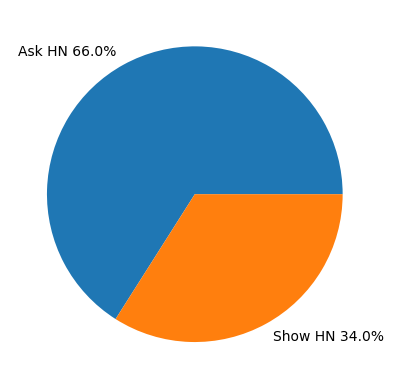

In [66]:
#pie chart to visualize comparison
plt.pie('comm %', data=summary, labels= summary['title']+' '+ summary['comm %'].astype(str)+'%')
plt.show()

In [77]:
#get the array of all comment numbers for Ask HN
a = model[model.title.str.contains('Ask HN')].num_comments

In [78]:
#get the array of all comment numbers for Show HN
b = model[model.title.str.contains('Show HN')].num_comments

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_comments', ylabel='Count'>

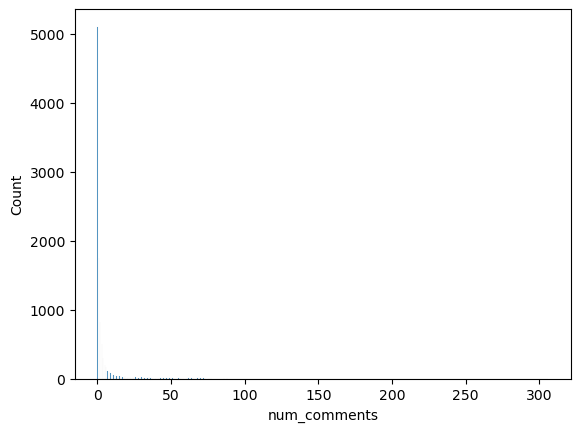

In [81]:
#histplot of b to visualise distribution
sns.histplot(b)

In [82]:
#appears to be outliers lets investigate
model.describe()

,num_points,num_comments
count,19291.000000,19291.000000
mean,13.182780,7.496656
std,46.997198,32.275180
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,1.000000
75%,7.000000,4.000000
max,1624.000000,1007.000000


In [84]:
#See how many comments are above 100
model[model.num_comments>100]

,title,num_points,num_comments,author,created_at
58,Show HN,301,102,natashabaker,9/24/2016 15:06
81,Ask HN,171,477,prmph,9/23/2016 20:18
161,Ask HN,442,266,curiousgal,9/22/2016 11:52
177,Show HN,184,167,gilsadis,9/21/2016 21:55
285,Show HN,893,169,fogleman,9/20/2016 12:55
...,...,...,...,...,...
18160,Ask HN,157,205,networked,9/30/2015 10:26
18313,Show HN,681,103,damjanstankovic,9/26/2015 20:29
18616,Show HN,572,163,orf,9/20/2015 19:50
18981,Show HN,134,103,navlio,9/12/2015 15:37


((array([-3.7879693 , -3.56155022, -3.43718551, ...,  3.43718551,
          3.56155022,  3.7879693 ]),
  array([   0,    0,    0, ...,  937,  947, 1007], dtype=int64)),
 (19.072485682545683, 10.40210364851539, 0.4379412453296621))

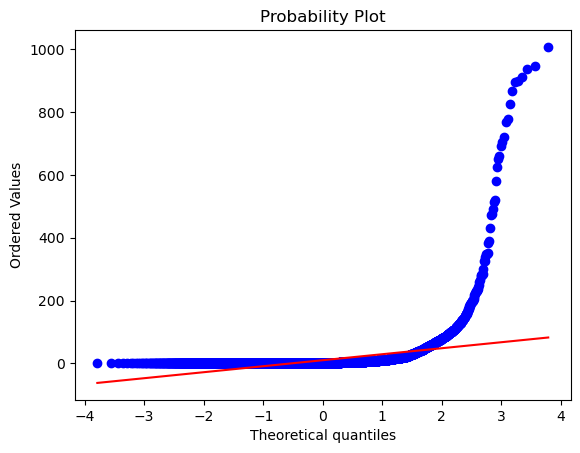

In [86]:
#Q-Q plot for a
import scipy.stats as stats
stats.probplot(a, dist="norm", plot=plt)

Normal assumption is violated. Data is heavy right skew. The tail end comments appear to be popular posts so their value is important and can't be taken away. Therefore, I wil perform a non-parametric t-test that doesn't require normality assumption.

In [87]:
# Perform Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(a, b)

print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 60916618.0, p-value: 0.0


I perfomed a Mann-Whitnet U test as data failed normality assumption as seen from the Q-Q plot and histplots. P-value is 0.00 so we reject null hypothesis and hence, means are different. We can conclude Ask HN have more comments on average.

In [88]:
model.head()

,title,num_points,num_comments,author,created_at
0,Ask HN,4,7,Sevrene,9/26/2016 2:53
1,Ask HN,6,3,PascLeRasc,9/26/2016 1:17
2,Show HN,2,0,saamm,9/26/2016 0:36
3,Show HN,1,0,christinecha,9/26/2016 0:01
4,Show HN,1,0,grondilu,9/25/2016 23:44


# Time Analysis

In [89]:
#check data types
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19291 entries, 0 to 19291
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         19291 non-null  object
 1   num_points    19291 non-null  int64 
 2   num_comments  19291 non-null  int64 
 3   author        19291 non-null  object
 4   created_at    19291 non-null  object
dtypes: int64(2), object(3)
memory usage: 904.3+ KB


In [95]:
#datetime is object so i will extract hour for analysis
model['time']=pd.to_datetime(model.created_at).dt.hour

In [96]:
model

,title,num_points,num_comments,author,created_at,time
0,Ask HN,4,7,Sevrene,9/26/2016 2:53,2
1,Ask HN,6,3,PascLeRasc,9/26/2016 1:17,1
2,Show HN,2,0,saamm,9/26/2016 0:36,0
3,Show HN,1,0,christinecha,9/26/2016 0:01,0
4,Show HN,1,0,grondilu,9/25/2016 23:44,23
...,...,...,...,...,...,...
19287,Ask HN,1,0,pipipzz,9/6/2015 11:27,11
19288,Ask HN,2,1,louisswiss,9/6/2015 10:52,10
19289,Ask HN,2,4,rationalthrowa,9/6/2015 10:46,10
19290,Ask HN,14,20,coroutines,9/6/2015 9:36,9


C:\Users\natha\AppData\Local\Temp\ipykernel_12968\21469759.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='time',y='num_comments',data=model, ci=None)
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


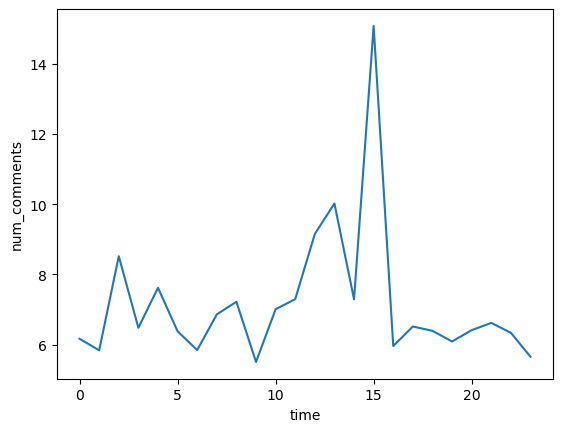

In [130]:
#Lineplot to visualise if any times stand out
sns.lineplot(x='time',y='num_comments',data=model, ci=None)
plt.show()

In [106]:
#Perform Anova test to compare each hour of day to see if statistically different
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#turn time column into category for anova
model['time'] = pd.Categorical(model['time'])

# Fit ANOVA model
anova = ols('num_comments ~ C(time)', data=model).fit()

# Perform ANOVA (Type 1)
anova_table = sm.stats.anova_lm(anova, typ=1)

In [107]:
# Print ANOVA table
print(anova_table)

               df        sum_sq      mean_sq         F        PR(>F)
C(time)      23.0  1.152029e+05  5008.820974  4.830333  1.793287e-13
Residual  19267.0  1.997894e+07  1036.951453       NaN           NaN


In [119]:
# Perform the Tukey's HSD post hoc test 
tukey_results = pairwise_tukeyhsd(endog=model['num_comments'], groups=model['time'], alpha=0.05)
a = tukey_results.summary()

C:\Users\natha\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


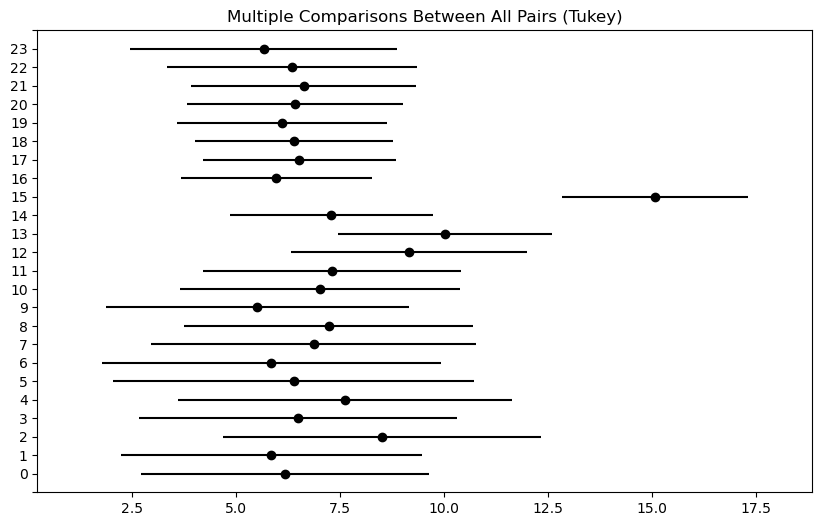

In [114]:
tukey_results.plot_simultaneous()
plt.show()

# Summary 


The analysis perfomed can now answer the original questions:
1. From non-parametric t-test we see means are statistically different and Ask HN has more comments on average.
2. From anova and tukey test we see most comments are posted at 3pm.